In [23]:
# 1. Data Collection

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

credit_card_data = pd.read_csv(r"C:\Users\Ahsan\Downloads\archive (2)\creditcard.csv")
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
# Check for missing values

credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [25]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
# Separate features and labels
X = credit_card_data.drop('Class', axis=1)
y = credit_card_data['Class']

In [27]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

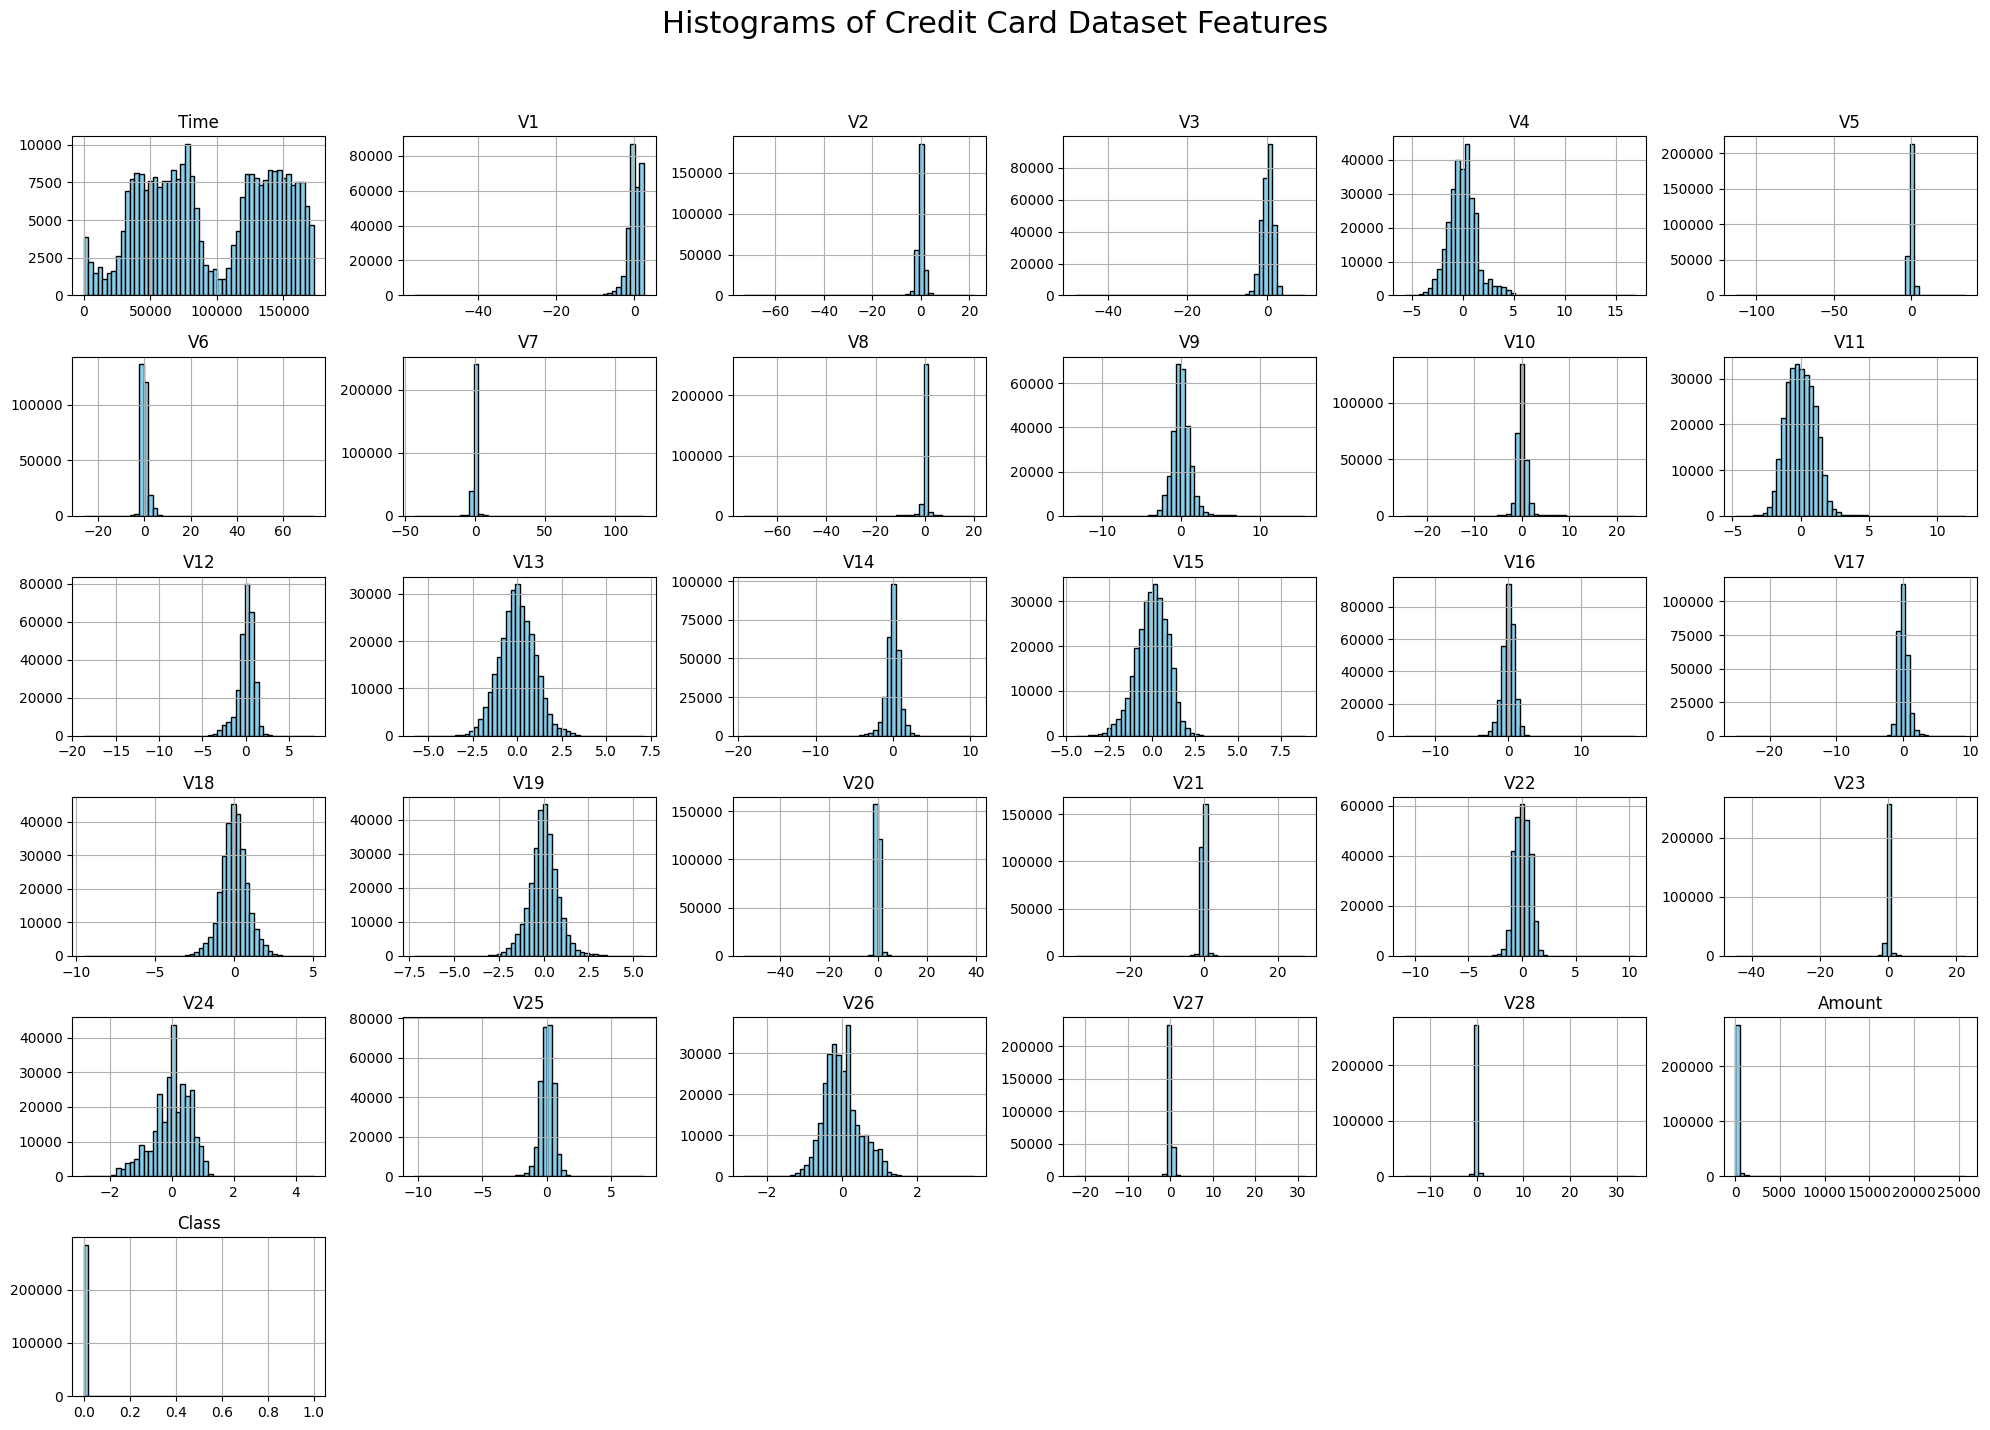

In [28]:
# 3. Exploratory Data Analysis (EDA)
# Histograms for All Features


import seaborn as sns
import matplotlib.pyplot as plt


credit_card_data.hist(bins=50, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Credit Card Dataset Features", fontsize=22)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # To fit title properly
plt.show()



In [29]:

# Correlation with 'Class' (fraud)
corr_matrix = credit_card_data.corr()
fraud_corr = corr_matrix['Class'].abs().sort_values(ascending=False)
print("Top correlated features with fraud:\n", fraud_corr.head(10))



Top correlated features with fraud:
 Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
Name: Class, dtype: float64


In [30]:
# 5. Splitting the Dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
# 6. Model Selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


# Model definitions
# lr_model = LogisticRegression(max_iter=1000)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# svm_model = SVC(kernel='rbf', class_weight='balanced')
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [32]:
# 7. Model Training

# lr_model.fit(X_train, y_train)
# rf_model.fit(X_train, y_train)
# svm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:18:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [33]:
# 8. Model Evaluation
# xg

from sklearn.metrics import classification_report, accuracy_score
# XGBoost
print("\n XGBoost Classifier Report:\n")
print(classification_report(y_test, xgb_model.predict(X_test)))


 XGBoost Classifier Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
# 9. Hyperparameter Tuning (logistics reg) 

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Step 1: Define your parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Step 2: Create the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Step 3: Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)


C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:18:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:18:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:18:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [18:19:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='f1')

In [35]:
# Save model

joblib.dump(grid_search.best_estimator_, "xgboost_fraud_model.pkl")
print(" Best XGBoost model saved as 'xgboost_fraud_model.pkl'")

 Best XGBoost model saved as 'xgboost_fraud_model.pkl'


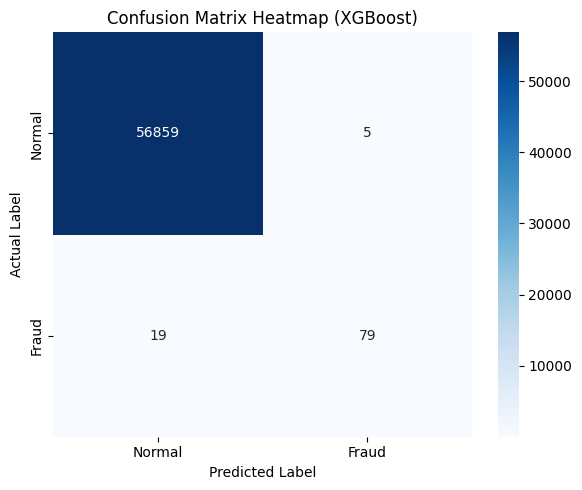

In [36]:
# Actual vs Predicted

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

#  Use predictions from the best XGBoost model
y_pred = best_xgb_model.predict(X_test)

#  Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Normal', 'Fraud']

# Plot heatmap using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix Heatmap (XGBoost)")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()
plt.show()

